In [1]:
import pandas as pd

df=pd.read_csv('cars.csv')
df.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Price
0,Mercedes-Benz,sedan,68,6.0,Petrol,yes,2011,S 600,300000.0
1,Mercedes-Benz,other,37,5.0,Petrol,yes,2012,G 500,300000.0
2,Mercedes-Benz,sedan,29,6.0,Petrol,yes,2011,S-Guard,295000.0
3,Mercedes-Benz,sedan,29,6.0,Petrol,yes,2011,S 600,295000.0
4,Mercedes-Benz,other,6,5.5,Petrol,yes,2016,S 63 AMG,250000.0


In [2]:
from sklearn import preprocessing

nBrand=preprocessing.LabelEncoder()
nBrand.fit(df['Brand'])

nBody=preprocessing.LabelEncoder()
nBody.fit(df['Body'])

nEngineType=preprocessing.LabelEncoder()
nEngineType.fit(df['Engine Type'])

nRegistration=preprocessing.LabelEncoder()
nRegistration.fit(df['Registration'])

nModel=preprocessing.LabelEncoder()
nModel.fit(df['Model'])

df['nBrand']=nBrand.transform(df['Brand'])
df['nBody']=nBody.transform(df['Body'])
df['nEngine Type']=nEngineType.transform(df['Engine Type'])
df['nRegistration']=nRegistration.transform(df['Registration'])
df['nModel']=nModel.transform(df['Model'])

df.drop(columns=['Brand','Body','Engine Type','Registration','Model'],inplace=True)
df.head()

,Mileage,EngineV,Year,Price,nBrand,nBody,nEngine Type,nRegistration,nModel
0,68,6.0,2011,300000.0,2,3,3,1,239
1,37,5.0,2012,300000.0,2,2,3,1,127
2,29,6.0,2011,295000.0,2,3,3,1,242
3,29,6.0,2011,295000.0,2,3,3,1,239
4,6,5.5,2016,250000.0,2,2,3,1,240


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4173 entries, 0 to 4172
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Mileage        4173 non-null   int64  
 1   EngineV        4025 non-null   float64
 2   Year           4173 non-null   int64  
 3   Price          4173 non-null   float64
 4   nBrand         4173 non-null   int32  
 5   nBody          4173 non-null   int32  
 6   nEngine Type   4173 non-null   int32  
 7   nRegistration  4173 non-null   int32  
 8   nModel         4173 non-null   int32  
dtypes: float64(2), int32(5), int64(2)
memory usage: 212.0 KB


In [4]:
df['EngineV'].fillna(value=df['EngineV'].mean(),inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4173 entries, 0 to 4172
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Mileage        4173 non-null   int64  
 1   EngineV        4173 non-null   float64
 2   Year           4173 non-null   int64  
 3   Price          4173 non-null   float64
 4   nBrand         4173 non-null   int32  
 5   nBody          4173 non-null   int32  
 6   nEngine Type   4173 non-null   int32  
 7   nRegistration  4173 non-null   int32  
 8   nModel         4173 non-null   int32  
dtypes: float64(2), int32(5), int64(2)
memory usage: 212.0 KB


In [5]:
df.describe()

,Mileage,EngineV,Year,Price,nBrand,nBody,nEngine Type,nRegistration,nModel
count,4173.000000,4173.000000,4173.000000,4173.000000,4173.000000,4173.000000,4173.000000,4173.000000,4173.000000
mean,164.141625,2.762127,2006.365684,19218.579430,3.171340,2.562425,1.301941,0.905584,163.211598
std,104.763054,4.846869,6.685332,24625.021129,2.084648,1.642627,1.359738,0.292442,86.903844
min,0.000000,0.600000,1969.000000,600.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.000000,1.900000,2003.000000,6999.000000,1.000000,1.000000,0.000000,1.000000,98.000000
50%,158.000000,2.200000,2007.000000,11500.000000,3.000000,3.000000,1.000000,1.000000,162.000000
75%,230.000000,3.000000,2012.000000,21700.000000,5.000000,3.000000,3.000000,1.000000,226.000000
max,980.000000,99.990000,2016.000000,300000.000000,6.000000,5.000000,3.000000,1.000000,305.000000


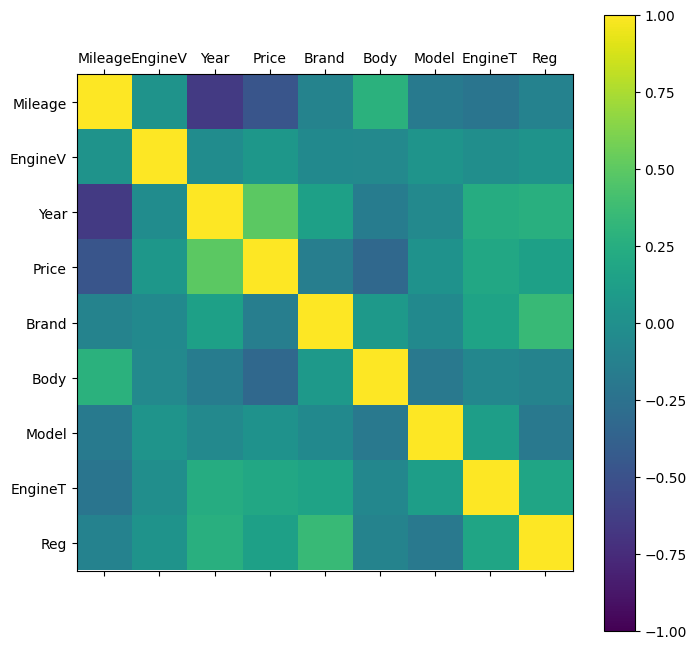

In [10]:
import matplotlib.pyplot as plt

correlations=df.corr(method='pearson')

fig=plt.figure(figsize=(8,8))

ax=fig.add_subplot(1,1,1)

cax=ax.matshow(correlations,vmin=-1,vmax=1)

fig.colorbar(cax)

ticks=[0,1,2,3,4,5,6,7,8]

ax.set_xticks(ticks)
ax.set_yticks(ticks)

ax.set_xticklabels(["Mileage","EngineV","Year","Price","Brand","Body","Model","EngineT","Reg"])
ax.set_yticklabels(["Mileage","EngineV","Year","Price","Brand","Body","Model","EngineT","Reg"])

plt.show()

In [13]:
X=df[['Mileage', 'Year',  'nBrand', 'nBody']]
y=df['Price']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

from sklearn.linear_model import LinearRegression
model=LinearRegression()

model.fit(X_train,y_train)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: -2682269.3324368577
Coefficients: [  -47.36536247  1357.75236328 -2427.52756475 -2779.20351864]


In [15]:
y_pred=model.predict(X_test)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math

print ('MSE :', mean_squared_error (y_pred, y_test))
print ('RMSE :', math.sqrt(mean_squared_error (y_pred, y_test)))
print ('MAE :', mean_absolute_error(y_pred, y_test))

MSE : 383364627.67053145
RMSE : 19579.699376408502
MAE : 10870.023029059306


In [23]:
year=2018
milage=60
body='sedan'
brand='Toyota'

nBodyEx=nBody.transform([body])[0]
nBrandEx=nBrand.transform([brand])[0]

ex=[[milage,year,nBrandEx,nBodyEx]]
print(ex)

exDf=pd.DataFrame(ex,columns=['Mileage', 'Year',  'nBrand', 'nBody'])

print(model.predict(exDf))

[[60, 2018, 5, 3]]
[34357.76652457]


In [24]:
y_pred= model.intercept_ + model.coef_[0]*milage + model.coef_[1]*2018 + model.coef_[2]*5 + model.coef_[3]*3
print(y_pred)

34357.766524567014
